In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
import seaborn as sns #biblioteca utilizada para os plots mais bonitos
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
dataframe_bikes_mod= pd.read_csv(nome_do_arquivo)

In [0]:
#Lendo as 5 primeiras linhas do dataset
dataframe_bikes_mod.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [0]:
dataframe_bikes_mod.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [0]:
#Verificando valores nulos na coluna dteday
dataframe_bikes_mod['dteday'].isnull().sum()

1738

In [0]:
#Quantidade de linhas e atributos do dataset
#(17379, 17)
dataframe_bikes_mod.shape

(17379, 17)

In [0]:
#Tratando valores nulos e criando um novo dataset.
df_bikes_novo = dataframe_bikes_mod.dropna(subset=['dteday'])
df_bikes_novo

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [0]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?
df_bikes_novo['windspeed'].describe()

count    14082.000000
mean         0.189552
std          0.122309
min          0.000000
25%          0.104500
50%          0.164200
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [0]:
#Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. 
#Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. 
#Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

df_bikes_novo.fillna(df_bikes_novo.mean(), inplace=True)
df_bikes_novo.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.000000,1.422432,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.000000,1.000000,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.000000,1.000000,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.683053,1.000000,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.000000,2.000000,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


In [0]:
#Conferindo se os campos foram preenchidos com a media das colunas.
df_bikes_novo['hum'].isnull().sum()

0

In [0]:
#Criando Varivel independentes e Dependentes
#X = df_bikes_novo['hum'].values,df_bikes_novo['casual'].values
X = df_bikes_novo['hum'].values #Variavel Independente
y = df_bikes_novo['cnt'].values #Variavel Dependente ou Resposta

In [0]:
print(X)
#print(y)

[0.8  0.8  0.75 ... 0.6  0.56 0.65]


In [0]:
#Correlação das variaveis X,y.
correlacao = np.corrcoef(X, y)
correlacao

array([[ 1.        , -0.29247198],
       [-0.29247198,  1.        ]])

In [0]:
#Fazer o Reshape a variavel X
X = X.reshape(-1, 1 ) #-1 não vai mexer nas linhas e 1 vai adicionar nova coluna e vai colocar no formato de matrix

In [0]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
modelo.intercept_ #Valor de interceptação

361.6317152662042

In [0]:
modelo.coef_ #inclinação da linha

array([-274.90843085])

In [0]:
modelo.score(X, y) #R2 quando o valor de X explica nossa previsão.

0.0855398563193458

In [0]:
previsoes = modelo.predict(X) #Criando a variavel previsões

In [0]:
print(previsoes)

[141.70497059 141.70497059 155.45039213 ... 196.68665676 207.68299399
 182.94123521]


In [0]:
modelo_ajustado = sm.ols(formula = 'cnt ~ hum', data = df_bikes_novo)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     1463.
Date:                Mon, 25 May 2020   Prob (F-statistic):          4.64e-306
Time:                        14:05:13   Log-Likelihood:            -1.0200e+05
No. Observations:               15641   AIC:                         2.040e+05
Df Residuals:                   15639   BIC:                         2.040e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    361.6317      4.697     76.993      0.000     352.425     370.838
hum         -274.9084      7.188    -38.248      0.000    -288.997    -260.820
==============================================================================
Omnibus:                     3636.865   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7857.774
Skew:                           1.350   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         7.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

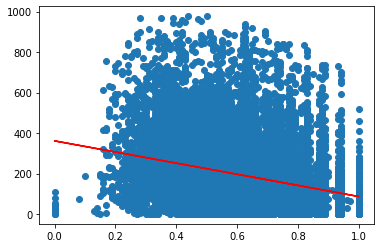

In [0]:
#Grafico de dispersão com linha de regressão
plt.scatter(X, y)
plt.plot(X, previsoes, color = 'red')

In [0]:
#Regressão linear multipla
#Preparando os Dados
xData = df_bikes_novo[['hum','casual']]
yData = df_bikes_novo['cnt']

In [0]:
#utiliza as funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg= LinearRegression() #objeto para a regressão linear
regressao= reg.fit (xData,yData) # realiza a regressão

previsao=reg.predict(xData)

MSE= mean_squared_error(yData,previsao) # encontra o MSE através do sklearn
print('MSE: ', MSE)


MSE:  17559.11536548527


In [0]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score #método para o cálculo do R2

R_2 = r2_score(yData, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-99.75012328   2.21512197]X 173.29337505135578
Coeficiente de Determinação (R2): 0.4059859251122173


In [0]:
modelo_ajustado2 = sm.ols(formula = 'cnt ~ hum + casual', data = df_bikes_novo)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     5344.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        14:05:45   Log-Likelihood:                -98626.
No. Observations:               15641   AIC:                         1.973e+05
Df Residuals:                   15638   BIC:                         1.973e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.2934      4.305     40.251      0.000     164.854     181.732
hum          -99.7501      6.099    -16.355      0.000    -111.705     -87.796
casual         2.2151      0.024     91.848      0.000       2.168       2.262
==============================================================================
Omnibus:                     5515.343   Durbin-Watson:                   0.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21209.647
Skew:                           1.743   Prob(JB):                         0.00
Kurtosis:                       7.515   Cond. No.                         406.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Selecione as colunas "season", "temp", "atemp", "hum", "windspeed".
#Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:
df_bikes_all = df_bikes_novo[['season', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [0]:
df_bikes_all.head()

,season,temp,atemp,hum,windspeed,cnt
1,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.24,0.2879,0.75,0.0000,1.0
5,1.0,0.24,0.2576,0.75,0.0896,1.0


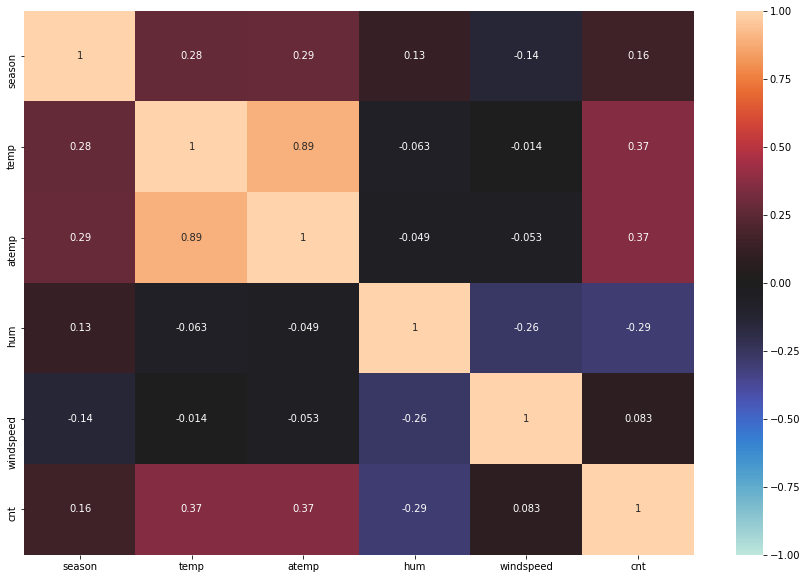

In [0]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(15, 10))
correlacao = df_bikes_all.corr()  #construindo a matriz de correlação
sns.heatmap(correlacao, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [0]:
df_bikes_all.head()

,season,temp,atemp,hum,windspeed,cnt
1,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.24,0.2879,0.75,0.0000,1.0
5,1.0,0.24,0.2576,0.75,0.0896,1.0


In [0]:
df_bikes_novo.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.000000,1.422432,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.000000,1.000000,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.000000,1.000000,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.683053,1.000000,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.000000,2.000000,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0


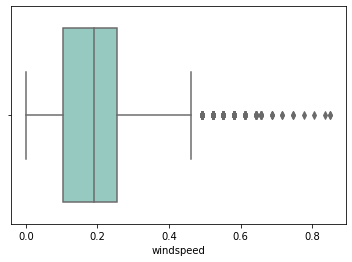

In [0]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?
ax = sns.boxplot(x="windspeed", hue="windspeed", data=df_bikes_novo, palette="Set3")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

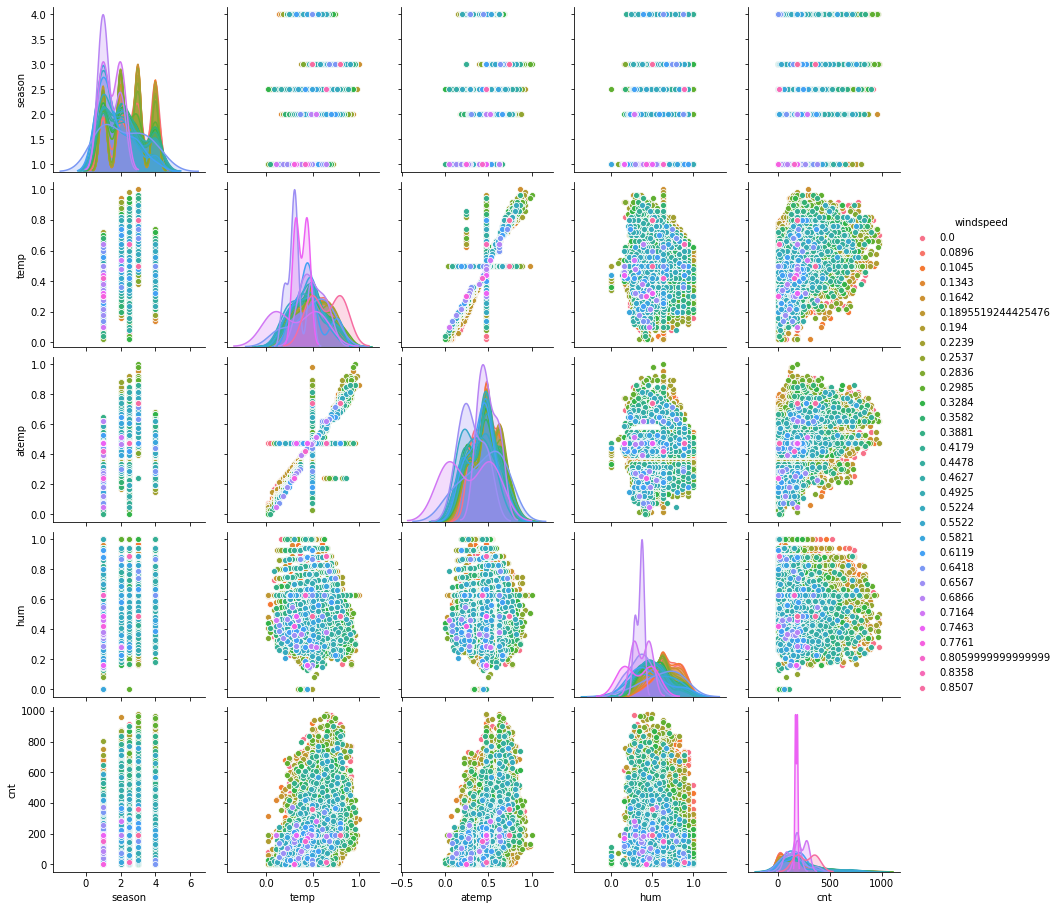

In [0]:
sns.pairplot(df_bikes_all, hue='windspeed')

In [0]:
#Após retirar as linhas que contém valores nulos para a coluna "dteday", 
#passamos a contar com quantas instancias e atributos, respectivamente?

df_bikes_novo.shape

(15641, 17)

In [0]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

df_bikes_novo['temp'].mean()

0.4969259206597602

In [0]:
#Quantos tipos diferentes de dados existem no dataset do desafio?
df_bikes_novo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.8+ MB


In [0]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?
df_datetime = df_bikes_novo[['dteday']]
df_datetime

In [0]:
print (type(df_datetime['dteday'][1]))
df_datetime['dteday'] = pd.to_datetime(df_datetime['dteday'])
print (type(df_datetime['dteday'][1]))
df_datetime['dteday'].tail()

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


17373   2012-12-31
17374   2012-12-31
17375   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, dtype: datetime64[ns]

In [0]:
#Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). 
#Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

In [0]:
#Criando novo dataset
df2 = dataframe_bikes_mod
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [0]:
#Trocando os valor NAN por média da coluna
df2.fillna(df_bikes_novo.mean(), inplace=True)
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.000000,1.000000,0.496926,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.000000,1.422432,0.220000,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.000000,1.000000,0.220000,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.000000,1.000000,0.240000,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.683053,1.000000,0.240000,0.2879,0.75,0.0,0.0,1.0,1.0


In [0]:
#Arvore de decisão regressora
X2 = df2[['hum','casual']].values
y2 = df2['cnt'].values #Variavel Dependente ou Resposta

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
#Criando o modelo de classificaçãor
regressor = DecisionTreeRegressor()  

In [0]:
#Treinando o modelo de classificação
regressor.fit(X2, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#realiza a previsão
previsao_arvore=regressor.predict(X2)

In [0]:
from sklearn import metrics
print('Erro absoluto:', metrics.mean_absolute_error(y2, previsao_arvore))
print('Mean Squared Error:', metrics.mean_squared_error(y2, previsao_arvore))

Erro absoluto: 60.62933362292776
Mean Squared Error: 9015.757261451265


In [0]:
from sklearn.metrics import r2_score

#Verificando o R2 ou Coeficiente de Determinação
print('R2: %.2f' % r2_score(y2, previsao_arvore))


R2: 0.70


In [0]:
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". 
#Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

df_bikes_novo['season'].dtypes

CategoricalDtype(categories=[1.0, 2.0, 2.5079297347272598, 3.0, 4.0], ordered=False)

In [0]:
# convert Series to categorical type - see docs for more details
df_bikes_novo['season'] = df_bikes_novo['season'].astype('category')

In [0]:
#Consultando os tipos de dados do dataframe
df_bikes_novo.dtypes

instant        float64
dteday          object
season        category
yr             float64
mnth           float64
hr             float64
holiday        float64
weekday        float64
workingday     float64
weathersit     float64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual         float64
registered     float64
cnt            float64
dtype: object

In [0]:
#Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
dataframe_bikes_mod['temp'].isnull().sum()

1738

In [0]:
#Quantificando em percentual os nulos da coluna temp.
temp_null = dataframe_bikes_mod.temp.isnull().sum()
temp_nnull = dataframe_bikes_mod.temp.count()

percent = (temp_null/(temp_null+temp_nnull))*100
print(percent) 

10.000575407100524
